In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

/Users/ivanmakarov/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [17]:
"""
def get_valid_columns_df(df):
    return df[list(filter(lambda col: col == "Step" or (col[-3:] not in ("MAX", "MIN")), df.columns))]

wandb1 = get_valid_columns_df(pd.read_csv("wandb1.csv"))
wandb2 = get_valid_columns_df(pd.read_csv("wandb2.csv"))
wandb_merged_filtered = wandb1.merge(wandb2)
wandb_merged_filtered.columns = list(map(lambda col: col.split(" ")[0], wandb_merged_filtered.columns))
wandb_merged_filtered.to_csv("wandb_merged_filtered.csv", index=False)
"""

'\ndef get_valid_columns_df(df):\n    return df[list(filter(lambda col: col == "Step" or (col[-3:] not in ("MAX", "MIN")), df.columns))]\n\nwandb1 = get_valid_columns_df(pd.read_csv("wandb1.csv"))\nwandb2 = get_valid_columns_df(pd.read_csv("wandb2.csv"))\nwandb_merged_filtered = wandb1.merge(wandb2)\nwandb_merged_filtered.columns = list(map(lambda col: col.split(" ")[0], wandb_merged_filtered.columns))\nwandb_merged_filtered.to_csv("wandb_merged_filtered.csv", index=False)\n'

In [18]:
wandb = pd.read_csv("wandb_merged_filtered.csv")
prefixes = set(col.rsplit('_', 1)[0] for col in wandb.columns[1:])

grouped_data = {prefix: wandb.filter(like=prefix).values for prefix in prefixes}

grouped_df = pd.DataFrame({prefix: [list(grouped_data[prefix][i]) for i in range(len(wandb))] for prefix in prefixes})

In [19]:
def get_df_regexp_columns(df, regexp):
    pattern = re.compile(regexp)
    matched_columns = [col for col in df.columns if pattern.match(col)]
    return df[matched_columns]

In [20]:
grouped_df

,CartPole_Comparison_500,CartPole_MSE_10,CartPole_MSE_300,CartPole_Preference_Improved100_50,CartPole_MSE_100,CartPole_Comparison_100,CartPole_Preference_Improved100_25,CartPole_MSE_50,CartPole_Comparison_300,CartPole_Comparison_200,...,CartPole_Preference_Improved100_500,CartPole_Preference_Improved100_100,CartPole_Preference_Improved100_10,CartPole_MSE_500,CartPole_MSE_200,CartPole_Preference_Improved100_200,CartPole_Comparison_50,CartPole_MSE_25,CartPole_Preference_Improved100_300,CartPole_Comparison_25
0,"[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25, 49.25, 27.5, ...","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25, 49.25, 27.5, ...","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25, 49.25, 27.5, ...","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]",...,"[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25, 49.25, 27.5, ...","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25, 49.25, 27.5, ...","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]","[49.25, 27.5, 31.5, 28.0, 31.25]"
1,"[36.5, 44.375, 37.0, 40.125, 24.625]","[37.5, 44.75, 28.5, 44.125, 27.75, 36.0, 31.0,...","[40.125, 36.125, 27.25, 36.25, 27.0]","[41.0, 35.0, 26.125, 34.875, 26.375, 41.875, 2...","[37.5, 44.75, 28.5, 44.125, 27.75]","[43.375, 36.25, 25.75, 41.25, 24.375]","[36.0, 35.625, 25.75, 35.25, 26.75]","[41.75, 35.875, 29.0, 34.0, 28.0, 36.25, 34.87...","[36.875, 35.375, 26.75, 37.5, 24.625]","[36.125, 35.625, 26.75, 35.875, 24.5]",...,"[41.0, 35.0, 26.125, 34.875, 26.375]","[37.125, 34.75, 25.625, 36.125, 30.25]","[37.125, 34.75, 25.625, 36.125, 30.25, 47.0, 3...","[41.75, 35.875, 29.0, 34.0, 28.0]","[42.25, 38.5, 26.625, 34.875, 26.375]","[44.75, 28.5, 26.75, 35.25, 24.5]","[36.5, 44.375, 37.0, 40.125, 24.625, 41.125, 3...","[37.375, 35.625, 26.625, 33.5, 28.5]","[39.375, 40.5, 26.75, 36.875, 24.5]","[37.0, 35.5, 25.75, 35.25, 32.25]"
2,"[32.25, 45.33333206176758, 33.66666793823242, ...","[34.66666793823242, 39.58333206176758, 23.1666...","[36.0, 34.25, 24.66666603088379, 33.0833320617...","[37.58333206176758, 36.0, 21.5, 36.08333206176...","[34.66666793823242, 39.58333206176758, 23.1666...","[39.58333206176758, 35.58333206176758, 22.3333...","[31.75, 33.58333206176758, 21.33333396911621, ...","[38.66666793823242, 39.08333206176758, 25.4166...","[34.66666793823242, 32.0, 21.91666603088379, 3...","[34.25, 33.08333206176758, 21.91666603088379, ...",...,"[37.58333206176758, 36.0, 21.5, 36.08333206176...","[37.0, 31.5, 21.08333396911621, 33.91666793823...","[37.0, 31.5, 21.08333396911621, 33.91666793823...","[38.66666793823242, 39.08333206176758, 25.4166...","[42.08333206176758, 37.16666793823242, 21.9166...","[39.5, 30.25, 21.83333396911621, 30.5, 24.6666...","[32.25, 45.33333206176758, 33.66666793823242, ...","[36.83333206176758, 35.83333206176758, 21.8333...","[39.5, 39.5, 21.91666603088379, 36.83333206176...","[34.0, 33.66666793823242, 21.33333396911621, 3..."
3,"[29.875, 41.625, 35.375, 40.375, 28.0625]","[32.9375, 35.125, 24.125, 45.25, 25.375, 29.62...","[35.625, 31.0, 30.0, 34.625, 36.875]","[36.6875, 32.25, 23.1875, 36.8125, 35.5625, 35...","[32.9375, 35.125, 24.125, 45.25, 25.375]","[42.5625, 34.0, 25.875, 35.0625, 23.0]","[30.4375, 31.5625, 23.3125, 30.8125, 24.0]","[43.375, 41.6875, 29.9375, 35.0, 34.5, 31.375,...","[38.1875, 33.6875, 23.5625, 39.4375, 22.6875]","[34.5625, 29.4375, 22.4375, 29.8125, 22.625]",...,"[36.6875, 32.25, 23.1875, 36.8125, 35.5625]","[31.3125, 28.375, 22.6875, 36.8125, 32.5]","[31.3125, 28.375, 22.6875, 36.8125, 32.5, 37.1...","[43.375, 41.6875, 29.9375, 35.0, 34.5]","[41.625, 37.625, 23.6875, 26.6875, 36.3125]","[40.6875, 26.375, 22.375, 26.6875, 22.25]","[29.875, 41.625, 35.375, 40.375, 28.0625, 41.9...","[30.9375, 35

In [21]:
preference_df = get_df_regexp_columns(grouped_df, r"CartPole_Comparison_\d+")
preference_margin100_df = get_df_regexp_columns(grouped_df, r"CartPole_Preference_Improved100_\d+")
mse_df = get_df_regexp_columns(grouped_df, r"CartPole_MSE_\d+")

In [22]:
plt.rc('font', size=14)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=14)   # legend fontsize

In [23]:
import math
def plot_reward(df, include_std=False, save_location=None):
    df_copy = df.copy(deep=True)
    df_copy.columns = list(map(lambda col: str(int(re.findall(r'\d+', col)[-1])) + " synthetic queries", df_copy.columns))
    means = df_copy.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

    # Think about using standard error instead
    # / math.sqrt(5) -> much nicer look
    stds = df_copy.applymap(lambda x: np.std(x) / math.sqrt(5) if isinstance(x, list) else np.nan)

    columns_sorted = sorted(df_copy.columns, key=lambda x: int(re.findall(r'\d+', x)[-1]))
    
    
    # Plot the mean values
    plt.figure(figsize=(12, 8))
    for column in columns_sorted:
        plt.plot(means.index * 2_000, means[column], label=column)
        if include_std:
            # do not highlight std of volatile runs
            #if not re.compile(r".*_(10|25)$").match(column):
            plt.fill_between(means.index * 2_000, means[column] - stds[column], means[column] + stds[column], alpha=0.2)
    
    plt.xlabel('Timestep', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.legend()
    #plt.grid(True)
    
    # Save the plot as a PNG file
    if save_location is not None:
        plt.savefig(save_location)
    plt.show()
    plt.close()

/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  means = df_copy.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)
/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stds = df_copy.applymap(lambda x: np.std(x) / math.sqrt(5) if isinstance(x, list) else np.nan)


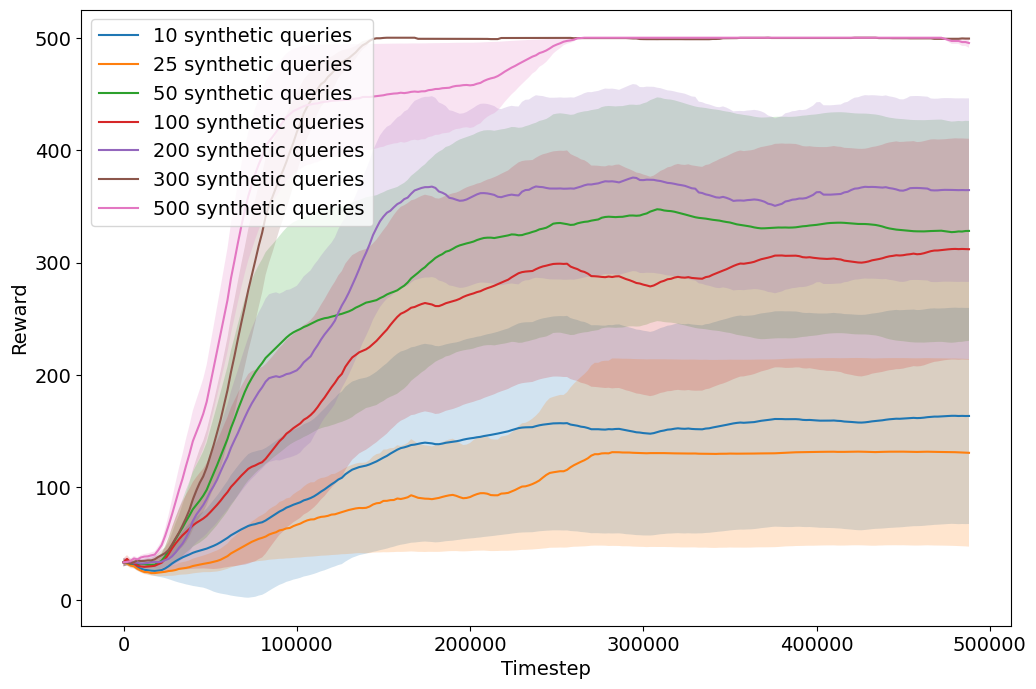

In [24]:
plot_reward(mse_df, include_std=True, save_location="rlhf_mse_cartpole.png")

/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  means = df_copy.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)
/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stds = df_copy.applymap(lambda x: np.std(x) / math.sqrt(5) if isinstance(x, list) else np.nan)


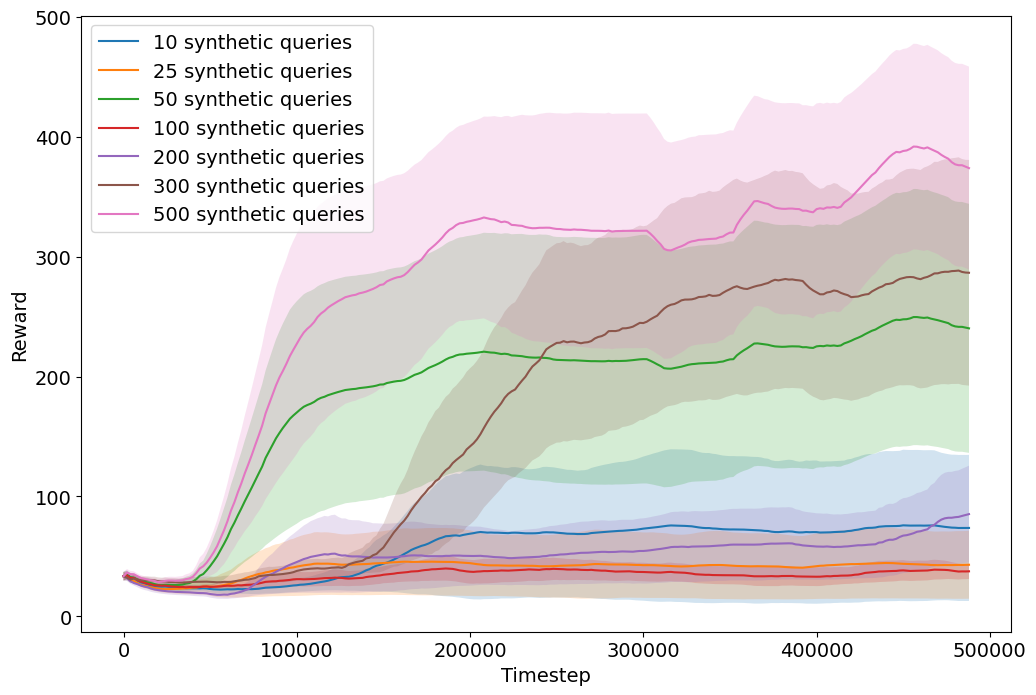

In [25]:
plot_reward(preference_df, include_std=True, save_location="rlhf_comparison_cartpole.png")

/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  means = df_copy.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)
/var/folders/th/9xhq_z9s043bb_ybjxvx30hm0000gn/T/ipykernel_40933/2487989146.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stds = df_copy.applymap(lambda x: np.std(x) / math.sqrt(5) if isinstance(x, list) else np.nan)


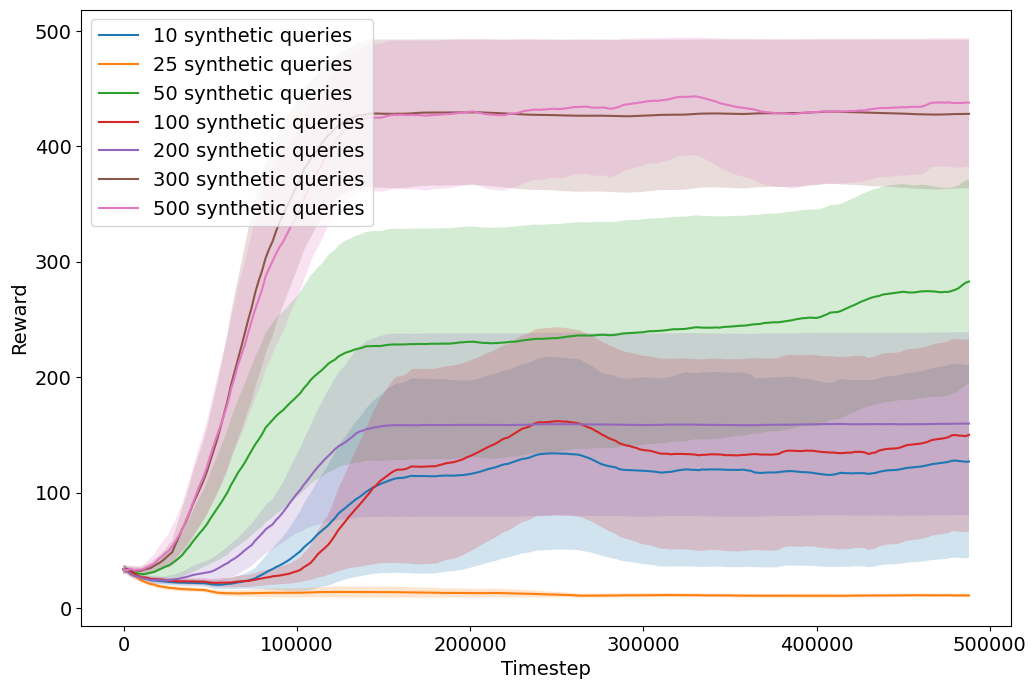

In [26]:
plot_reward(preference_margin100_df, include_std=True, save_location="rlhf_marginal_comparison_cartpole.png")